In [2]:
import numpy as np
import kmeans
import common
import naive_em
import em

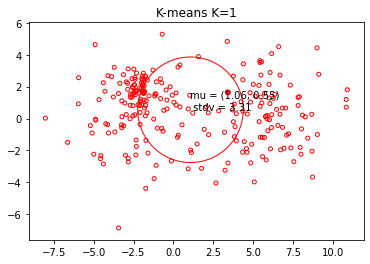

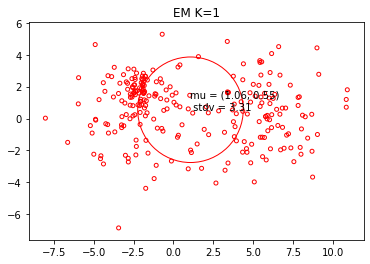

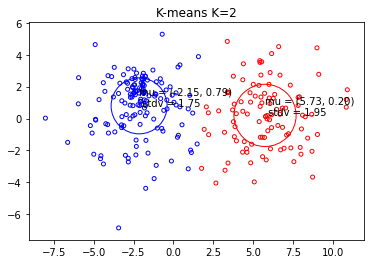

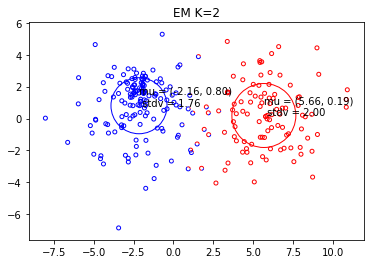

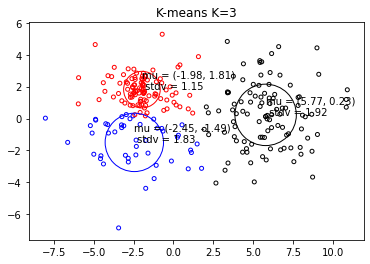

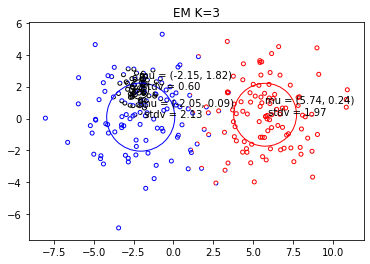

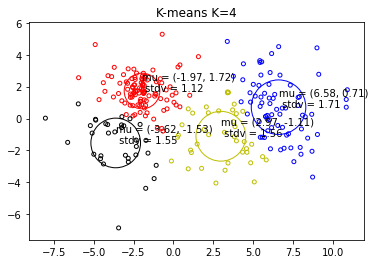

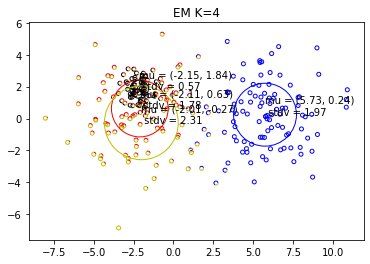

BICs:  [-1315.50562314 -1195.03974258 -1169.25893474 -1180.01213258]
Best BIC:  -1169.2589347355095
Best K:  3
K = 12, LL = -1390234.4223469389


NameError: name 'log_gaussian' is not defined

In [3]:
X = np.loadtxt("toy_data.txt")

Ks = [1, 2, 3, 4]
seeds = [0, 1, 2, 3, 4]
BICs = np.empty(len(Ks))

for i, K in enumerate(Ks):
    k_best_mix, k_best_post, k_best_cost = None, None, np.inf
    em_best_mix, em_best_post, em_best_ll = None, None, -np.inf
    for seed in seeds:
        init_mix, init_post = common.init(X, K, seed)
        k_mix, k_post, k_cost= kmeans.run(X, init_mix, init_post)
        em_mix, em_post, em_ll= naive_em.run(X, init_mix, init_post)
        if k_cost < k_best_cost:
            k_best_mix, k_best_post, k_best_cost = k_mix, k_post, k_cost
        if em_ll > em_best_ll:
            em_best_mix, em_best_post, em_best_ll = em_mix, em_post, em_ll
    BICs[i] = common.bic(X, em_best_mix, em_best_ll)
    common.plot(X, k_best_mix, k_best_post, "K-means K={}".format(K))
    common.plot(X, em_best_mix, em_best_post, "EM K={}".format(K))
    
print("BICs: ", BICs)
print("Best BIC: ", np.max(BICs))
print("Best K: ", Ks[np.argmax(BICs)])


X = np.loadtxt("netflix_incomplete.txt")

K = 12
seeds = [0, 1, 2, 3, 4]

em_best_mix, em_best_post, em_best_ll = None, None, -np.inf
for seed in seeds:
    init_mix, init_post = common.init(X, K, seed)
    em_mix, em_post, em_ll= em.run(X, init_mix, init_post)
    if em_ll > em_best_ll:
        em_best_mix, em_best_post, em_best_ll = em_mix, em_post, em_ll
print("K = {}, LL = {}".format(K, em_best_ll))

X_fill_pred = em.fill_matrix(X, em_best_mix)
X_fill = np.load("netflix_complete")

print("X_filled Error:", common.rmse(X_fill_pred, X_fill))
